In [ ]:
!pip install Basemap
!pip install geopandas

     |████████████████████████████████| 863 kB 7.1 MB/s 
     |████████████████████████████████| 30.5 MB 1.2 MB/s 
     |████████████████████████████████| 219 kB 59.2 MB/s 
     |████████████████████████████████| 6.3 MB 34.5 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=af6cbfa5f263aa7294edeb0913a57df493027c20eec1ef0fd68e85a49a3cd386
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


     |████████████████████████████████| 1.0 MB 6.7 MB/s 
     |████████████████████████████████| 16.7 MB 99 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.lines as mlines

In [ ]:
def advanced_visualization (airport_df, routes_df):
  if (airport_df is None) or (routes_df is None):
    print ("Data cannot be retrieved and read")
  else:
    airport_us = airport_df[(airport_df.Country == "India")]
    us_airport_ix = airport_us.index.values
    routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
		                     (routes_df['Dest Airport ID'].isin(us_airport_ix))] #extract routes that flyies from AND to USA
    routes_us =  pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))
		# to find number of flights in and out of an airport
		# it is similar to find number of rows in which each airport occur in either one of the 2 columns
    counts = routes_us['Source Airport'].append(routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']).value_counts()
		# create a data frame of position based on names in count
    counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
    pos_data = counts.merge(airport_us, on = 'IATA')

		# Create graph
    graph = nx.from_pandas_edgelist(routes_us, source = 'Source Airport', target = 'Dest Airport',
		                        edge_attr = 'counts',create_using = nx.DiGraph())

    # Set up base map
    plt.figure(figsize=(15,20))
    m = Basemap(
		        projection='merc',
		        # llcrnrlon=-180,
		        # llcrnrlat=10,
		        # urcrnrlon=-50,
		        # urcrnrlat=70,
		        # lat_ts=0,
            llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77,
		        resolution='l',
		        suppress_ticks=True)

    # import long lat as m attribute
    mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
    pos = {}
    for count, elem in enumerate (pos_data['IATA']):
      pos[elem] = (mx[count], my[count])

		# draw nodes and edges and overly on basemap
    threshold = 30
    nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= threshold],
		                       node_color = 'r', alpha = 0.8,
		                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= threshold])

    nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
		                        labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= threshold})

    nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < threshold],
		                       node_color = 'b', alpha = 0.6,
		                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < threshold])

    nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g', width = routes_us['counts']*0.75, 
		                       alpha=0.06, arrows = False)

    m.drawcountries(linewidth = 3)
    m.drawstates(linewidth = 0.2)
    m.drawcoastlines(linewidth=1)
    m.fillcontinents(alpha = 0.3)
    line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
    line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue")
    line3 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
    plt.legend((line1, line2, line3), ('Large Airport > 30 routes', 'Smaller airports', 'routes'),
		           loc=4, fontsize = 'xx-large')
    # plt.title("Network graph of flight routes in India", fontsize = 30)
    #m.bluemarble()
    plt.tight_layout()
    plt.savefig("./map_3.png", format = "png", dpi = 300)
    plt.show()
    print ("successful visualization")
    return 0

In [ ]:
def simple_visualization (airport_df, routes_df):
	if (airport_df is None) or (routes_df is None):
		print("Data cannot be retrieved and read")
	else:
		airport_us = airport_df[(airport_df.Country == "India")][['Name','Lat', 'Long', 'IATA', 'ICAO']]
		print(airport_us)
		us_airport_ix = airport_us.index.values
		print(us_airport_ix)
		routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
		                     (routes_df['Dest Airport ID'].isin(us_airport_ix))] # extract routes that flyies from and to India
		print(routes_us)
		routes_us =  pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))
		# to find number of flights in and out of an airport
		# it is similar to find number of rows in which each airport occur in either one of the 2 columns
		counts = routes_us['Source Airport'].append(routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']).value_counts()
		# create a data frame of position based on names in count
		counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
		pos_data = counts.merge(airport_us, on = 'IATA')

		# Create graph
		graph = nx.from_pandas_edgelist(routes_us, source = 'Source Airport', target = 'Dest Airport',
		                        edge_attr = 'counts',create_using = nx.DiGraph())

		# default graph using Networkx inbuilt graph tools
		plt.figure(figsize = (10,9))
		nx.draw_networkx(graph)
		plt.savefig("./map_0.png", format = "png", dpi = 300)
		plt.show()

		# Set up base map
		plt.figure(figsize=(15,20))
		m = Basemap(
		        projection='merc',
		        # llcrnrlon=-180,
		        # llcrnrlat=10,
		        # urcrnrlon=-50,
		        # urcrnrlat=70,
		        # lat_ts=0,
						llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77,
		        resolution='l',
		        suppress_ticks=True)

		# import long lat as m attribute
		mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
		pos = {}
		for count, elem in enumerate (pos_data['IATA']):
		    pos[elem] = (mx[count], my[count])

		# draw nodes and edges and over aly on basemap
		nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = graph.nodes(), node_color = 'r', alpha = 0.8,
		                       node_size = [counts['total_flight'][s]*3 for s in graph.nodes()])
		nx.draw_networkx_edges(G = graph, pos = pos, edge_color='g', width = routes_us['counts']*0.75, 
		                       alpha=0.2, arrows = False)

		m.drawcountries(linewidth = 3)
		m.drawstates(linewidth = 0.2)
		m.drawcoastlines(linewidth=3)
		plt.tight_layout()
		plt.savefig("./map_2.png", format = "png", dpi = 300)
		plt.show()
		print ("successful visualization")
		return 0

In [ ]:
# download airport info data
airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 
                'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",
                        names = airport_col, index_col = 0)
airport_df.to_csv("airports.csv")

# download flight routes data
route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID',
              'Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
routes_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",
                        names = route_cols)
#clean up data, change 'object' type to numeric and drops NaNs
routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'], 'coerce')
routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'], 'coerce')
routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"]) 
routes_df.to_csv("routes.csv")

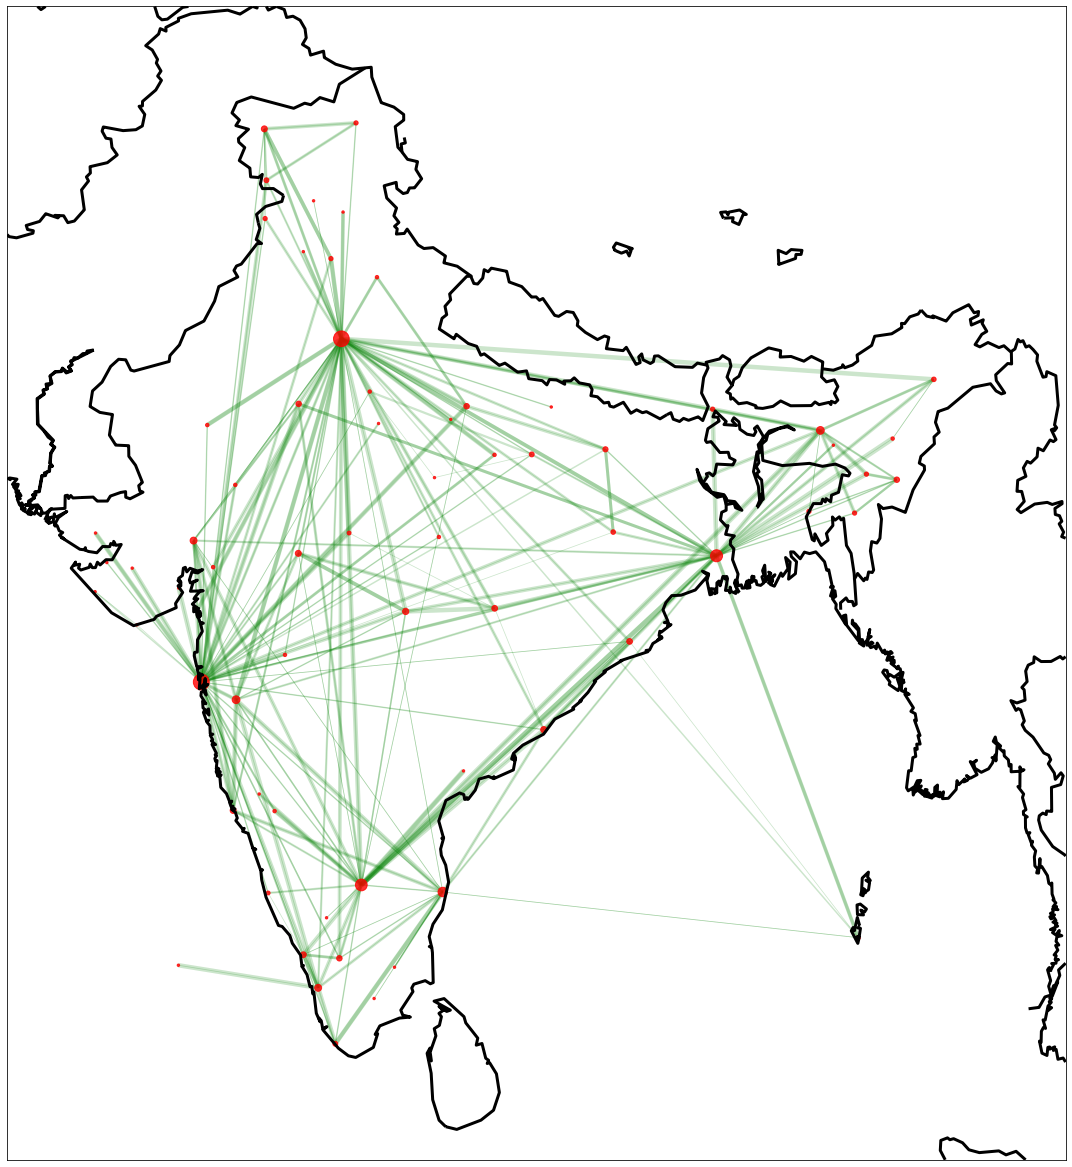

In [ ]:
airport_india = airport_df[(airport_df.Country == "India")][['Name','Lat', 'Long', 'IATA', 'ICAO']]
airport_india.to_csv('india_airport_dataset.csv')
# print(airport_india)
india_airport_ix = airport_india.index.values
# print(india_airport_ix)
routes_india = routes_df[(routes_df['Source Airport ID'].isin(india_airport_ix)) &
                      (routes_df['Dest Airport ID'].isin(india_airport_ix))] # extract routes that flyies from and to India
# print(routes_india)
routes_india =  pd.DataFrame(routes_india.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))
# print(routes_india)

# to find number of flights in and out of an airport
# it is similar to find number of rows in which each airport occur in either one of the 2 columns
counts = routes_india['Source Airport'].append(routes_india.loc[routes_india['Source Airport'] != routes_india['Dest Airport'], 'Dest Airport']).value_counts()
# print(routes_india['Source Airport'].append(routes_india.loc[routes_india['Source Airport'] != routes_india['Dest Airport'], 'Dest Airport']).value_counts())
# print(counts)

# create a data frame of position based on names in count
counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
# print(counts)
pos_data = counts.merge(airport_india, on = 'IATA')
# print(pos_data)

# Create graph
graph = nx.from_pandas_edgelist(routes_india, source = 'Source Airport', target = 'Dest Airport',
                                edge_attr = 'counts', create_using = nx.DiGraph())

# default graph using Networkx inbuilt graph tools
# plt.figure(figsize = (10,9))
# nx.draw_networkx(graph)
# plt.savefig("./map_0.png", format = "png", dpi = 300)
# plt.show()

# Set up base map
plt.figure(figsize=(15,20))
m = Basemap(
        projection='merc',
        # llcrnrlon=-180,
        # llcrnrlat=10,
        # urcrnrlon=-50,
        # urcrnrlat=70,
        # lat_ts=0,
        llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77,
        resolution='l',
        suppress_ticks=True)

# print(m)

# import long lat as m attribute
mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
# print(mx, my)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
    pos[elem] = (mx[count], my[count])

# draw nodes and edges and over aly on basemap
# print(counts["total_flight"])
nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = graph.nodes(), node_color = 'r', alpha = 0.8,
                        node_size = [counts['total_flight'][s]*3 for s in graph.nodes()])
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='g', width = routes_india['counts']*0.75, 
                        alpha=0.2, arrows = False)

m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.savefig("./map_2.png", format = "png", dpi = 300)

plt.show()

                                                 Name        Lat       Long  \
ID                                                                            
2994   Sardar Vallabhbhai Patel International Airport  23.077200  72.634697   
2995                                    Akola Airport  20.698999  77.058601   
2996                               Aurangabad Airport  19.862700  75.398102   
2997        Chhatrapati Shivaji International Airport  19.088699  72.867897   
2998                                 Bilaspur Airport  21.988400  82.111000   
...                                               ...        ...        ...   
13513                                  Shirdi Airport  19.688611  74.378889   
13514                                 Jeypore Airport  18.879999  82.552002   
13724                              Kishangarh Airport  26.601473  74.814147   
13725                    Kannur International Airport  11.918614  75.547211   
14098                                Jakkur Aerodrom

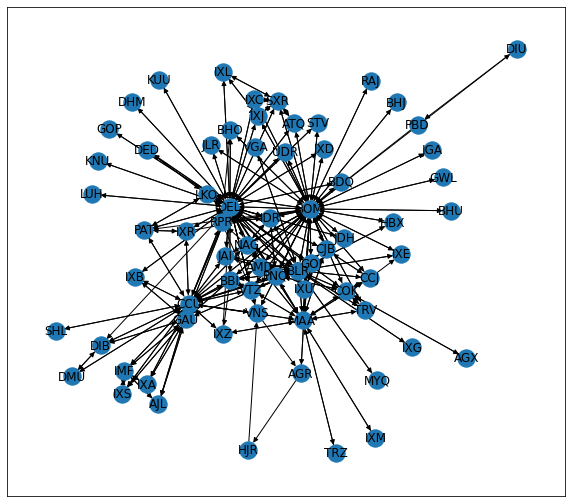

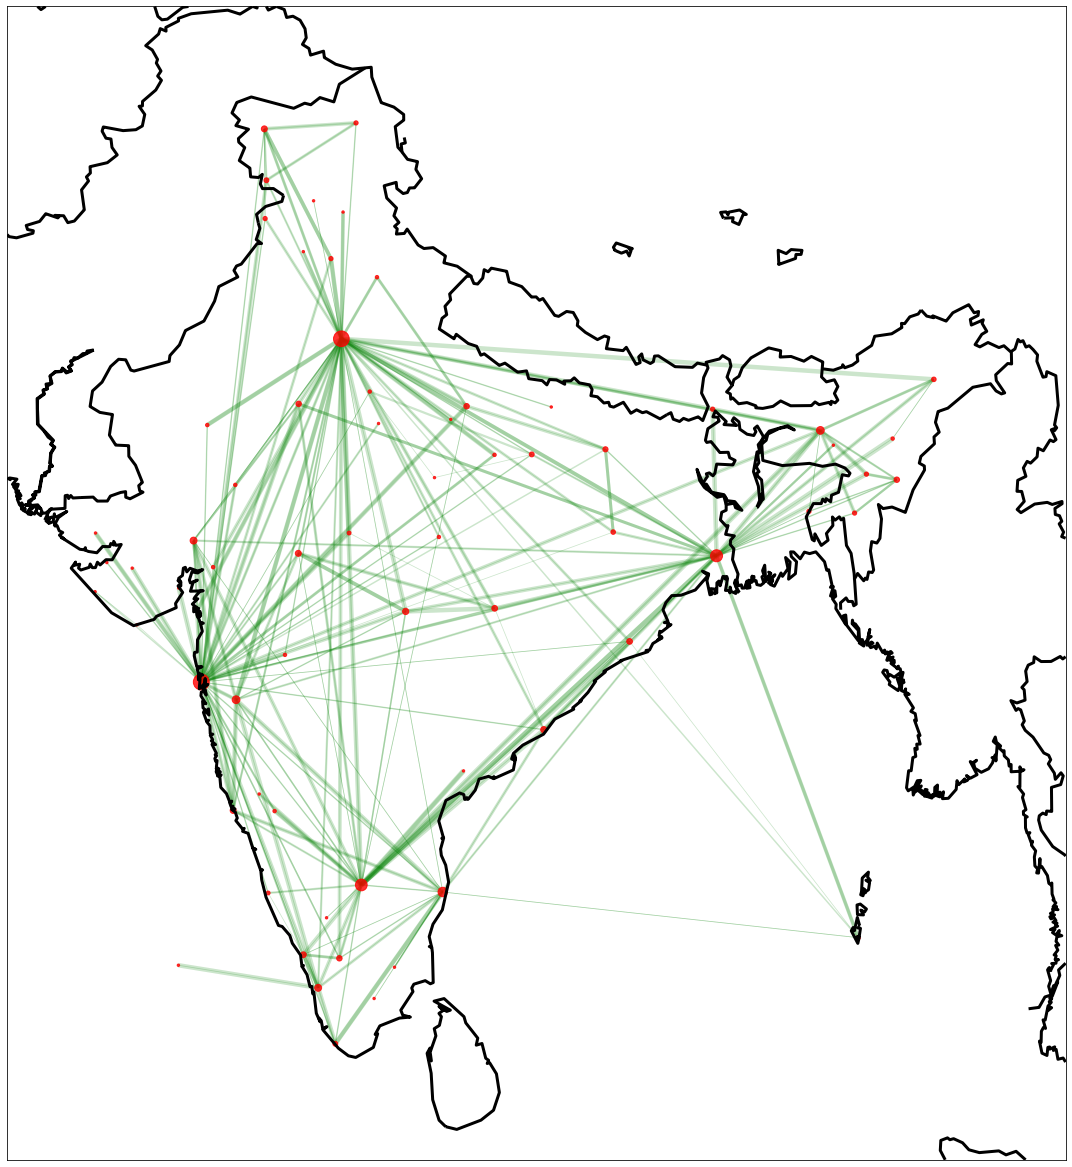

successful visualization


0

In [ ]:
simple_visualization(airport_df, routes_df)

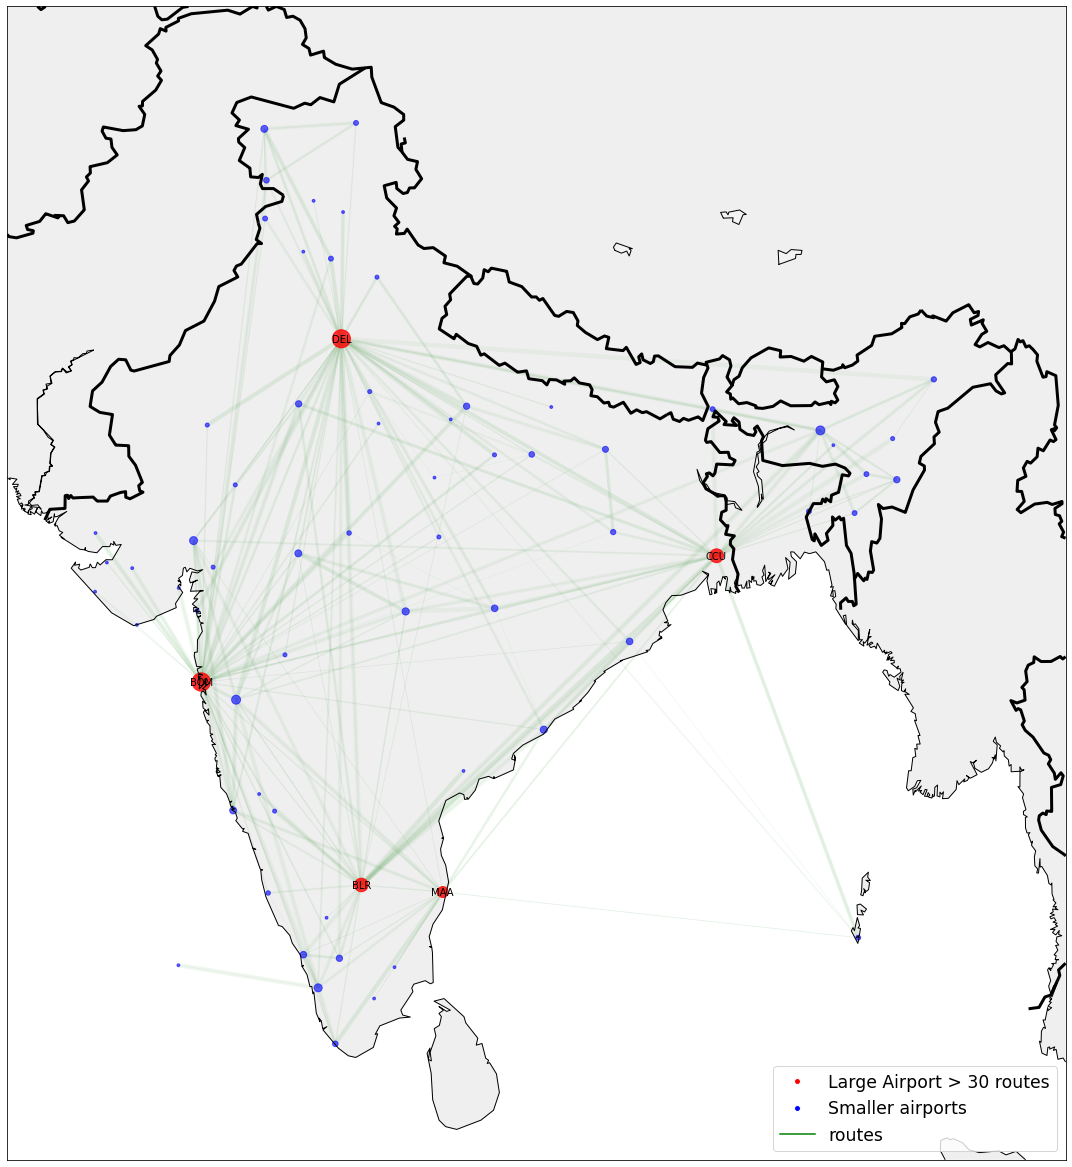

successful visualization


0

In [ ]:
advanced_visualization(airport_df, routes_df)

In [ ]:
def filtered_states(fname, word, path):
    df = pd.read_csv(fname)
    states = []
    for i, row in enumerate(df["location"]):
        if type(row) == float or type(row) == int:
            states.append("")
            continue
        longitude = 72.8678970337
        latitude = 19.0886993408
        endpoint = "https://api.mapbox.com/geocoding/v5/mapbox.places/{},{}.json?access_token=pk.eyJ1IjoianJhdmkyNDgiLCJhIjoiY2p6ZWM2N2k2MDB4YTNocWZpY3pzaWxmdiJ9.Enc1s0Mal1UmnYm-tJqqyA".format(
            longitude,latitude)
        resp = requests.get(endpoint)
        data = resp.json()
        if 'features' not in data or len(data["features"]) == 0:
            states.append("")
            continue
        place = data["features"][0]["place_name"]
        try:
            state = place.split(",")[-2].strip()
        except IndexError:
            states.append("")
            continue
        states.append(state)

    df['state'] = states
    df.to_csv(path + '/' + word + '_classified_with_states.csv')

In [ ]:
import requests
import json
all_states = []
for i in range(len(pos_data)):
  longitude = pos_data['Long'][i]
  latitude = pos_data['Lat'][i]
  # print(longitude, latitude)
  endpoint = "https://api.mapbox.com/geocoding/v5/mapbox.places/{},{}.json?access_token=pk.eyJ1IjoianJhdmkyNDgiLCJhIjoiY2p6ZWM2N2k2MDB4YTNocWZpY3pzaWxmdiJ9.Enc1s0Mal1UmnYm-tJqqyA".format(
              longitude,latitude)
  resp = requests.get(endpoint)
  data = resp.json()
  if 'features' not in data or len(data["features"]) == 0:
    all_states.append("")
    continue
  state = data["features"][0]["place_name"].split(",")[-2]
  all_states.append(state.strip().lower())

pos_data['state'] = all_states
pos_data
print(len(pos_data))


68


In [ ]:
from collections import Counter
states_freq = Counter(all_states)
states_freq
print(sum(states_freq.values()))

68


In [ ]:
from pandas.core.frame import DataFrame
state_pop_raw = pd.read_csv("statewise_population.csv")
state_pop = DataFrame()
state_pop['state'] = state_pop_raw['States_Union Territories']
state_pop['population'] = state_pop_raw['2011- POP']
freq = []
for i in range(len(state_pop)):
  freq.append(states_freq[state_pop['state'][i].lower()])
state_pop['no_of_airports'] = freq

state_pop

,state,population,no_of_airports
0,Andaman and Nicobar Islands,381,1
1,Andhra Pradesh,84581,2
2,Arunachal Pradesh,1384,0
3,Assam,31206,3
4,Bihar,104099,1
5,Chandigarh,1055,0
6,Chhattisgarh,25545,1
7,Delhi,16788,1
8,Goa,1459,1
9,Gujarat,60440,8


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
ratios = []
states = []
for i in range(len(state_pop)):
  ratios.append(state_pop["no_of_airports"][i] / state_pop["population"][i] * 10000)
  states.append(state_pop["state"][i].lower())
state_pop["ratio"] = ratios
state_pop["state"] = states
state_pop = state_pop.replace("andaman & nicobar islands", "andaman & nicobar")
state_pop

,state,population,no_of_airports,ratio
0,andaman and nicobar islands,381,1,26.246719
1,andhra pradesh,84581,2,0.236460
2,arunachal pradesh,1384,0,0.000000
3,assam,31206,3,0.961354
4,bihar,104099,1,0.096062
5,chandigarh,1055,0,0.000000
6,chhattisgarh,25545,1,0.391466
7,delhi,16788,1,0.595664
8,goa,1459,1,6.854010
9,gujarat,60440,8,1.323627


In [ ]:
state_area = pd.read_csv("state_area.csv")
state_area_dict = {}
for index, row in state_area.iterrows():
  state_area_dict[row["State"].lower()] = row[" Area"]

areas = []
ratios = []
final_ratios = []

for index, row in state_pop.iterrows():
  if row["state"] in state_area_dict:
    areas.append(state_area_dict[row["state"]])
    ratio = row["no_of_airports"] / state_area_dict[row["state"]] * 10000
    # print(row["population"] / state_area_dict[row["state"]])
    final_ratio = row["population"] / state_area_dict[row["state"]]
    final_ratio = row["no_of_airports"] / final_ratio
    # final_ratio = row["no_of_airports"] / state_area_dict[row["state"]]
    # final_ratio = final_ratio / row["population"] * 10000
    ratios.append(ratio)
    final_ratios.append(final_ratio)
  else:
    areas.append(0)
    ratios.append(0)
    final_ratios.append(0)

state_pop["Area"] = areas
state_pop["airports_by_area"] = ratios
state_pop["airports_by_area_by_population"] = final_ratios

state_pop = state_pop.replace("andaman and nicobar islands", "andaman & nicobar")
state_pop = state_pop.replace("jammu and kashmir", "jammu & kashmir")
state_pop

,state,population,no_of_airports,ratio,Area,airports_by_area,airports_by_area_by_population
0,andaman & nicobar,381,1,26.246719,8249,1.212268,21.650919
1,andhra pradesh,84581,2,0.236460,162968,0.122723,3.853537
2,arunachal pradesh,1384,0,0.000000,83743,0.000000,0.000000
3,assam,31206,3,0.961354,78438,0.382468,7.540665
4,bihar,104099,1,0.096062,94163,0.106199,0.904552
5,chandigarh,1055,0,0.000000,114,0.000000,0.000000
6,chhattisgarh,25545,1,0.391466,135191,0.073969,5.292269
7,delhi,16788,1,0.595664,1490,6.711409,0.088754
8,goa,1459,1,6.854010,3702,2.701243,2.537354
9,gujarat,60440,8,1.323627,196024,0.408113,25.946261


In [ ]:
import geopandas as gpd

nb = 'Admin2.shp'
regions = gpd.read_file(nb)

regions['ST_NM'] = regions['ST_NM'].str.lower()

In [ ]:
merged = regions.set_index('ST_NM').join(state_pop.set_index('state'))
# merged = regions.set_index('ST_NM').join(state_area.set_index('State'))
merged = merged.replace(np.nan, 0)
# merged = merged.drop('andaman & nicobar')
# merged = merged.drop('mizoram')
merged = merged.drop('delhi')
merged

,geometry,population,no_of_airports,ratio,Area,airports_by_area,airports_by_area_by_population
andaman & nicobar,"MULTIPOLYGON (((93.89967 7.08157, 93.89950 7.0...",381.0,1.0,26.246719,8249.0,1.212268,21.650919
andhra pradesh,"MULTIPOLYGON (((80.77754 15.86372, 80.77785 15...",84581.0,2.0,0.236460,162968.0,0.122723,3.853537
arunachal pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477...",1384.0,0.0,0.000000,83743.0,0.000000,0.000000
assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227...",31206.0,3.0,0.961354,78438.0,0.382468,7.540665
bihar,"POLYGON ((84.10851 27.52135, 84.10899 27.52069...",104099.0,1.0,0.096062,94163.0,0.106199,0.904552
chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420...",1055.0,0.0,0.000000,114.0,0.000000,0.000000
chhattisgarh,"POLYGON ((83.32474 24.10418, 83.32704 24.10237...",25545.0,1.0,0.391466,135191.0,0.073969,5.292269
dadra and nagar haveli and daman and diu,"MULTIPOLYGON (((73.21066 20.12045, 73.21082 20...",0.0,0.0,0.000000,0.0,0.000000,0.000000
goa,"POLYGON ((73.85648 15.80076, 73.85693 15.80064...",1459.0,1.0,6.854010,3702.0,2.701243,2.537354
gujarat,"MULTIPOLYGON (((69.33947 22.38579, 69.33982 22...",60440.0,8.0,1.323627,196024.0,0.408113,25.946261


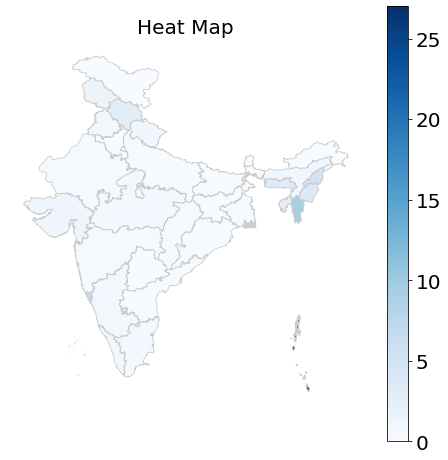

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.axis('off')
ax.set_title('Heat Map', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Blues'
vmin, vmax = 0, 27
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('ratio', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()
# plt.savefig("heat_pos.png", transparent=True)

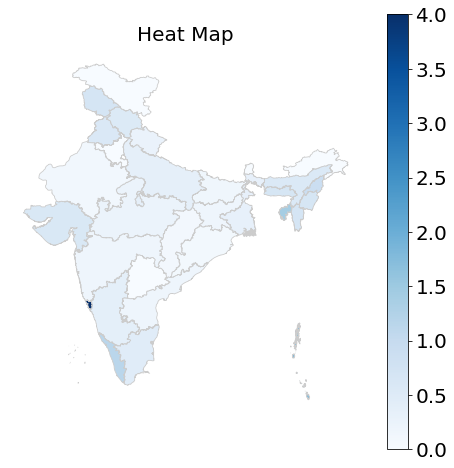

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.axis('off')
ax.set_title('Heat Map', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Blues'
vmin, vmax = 0, 4
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('airports_by_area', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()
# plt.savefig("heat_pos.png", transparent=True)

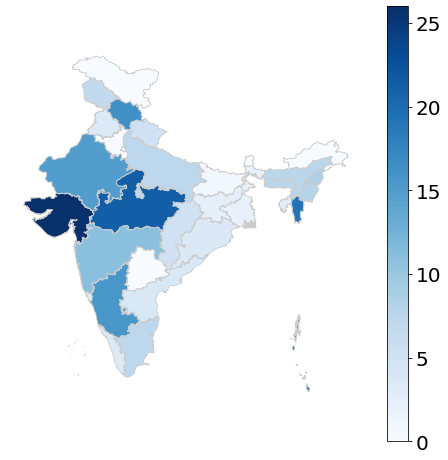

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.axis('off')
# ax.set_title('Heat Map', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Blues'
vmin, vmax = 0, 26
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('airports_by_area_by_population', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()
# plt.savefig("heat_pos.png", transparent=True)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
gr3 = merged
new_ratio = []
for i in range(len(merged)):
  if merged['no_of_airports'][i] > 0:
    new_ratio.append(merged['ratio'][i])
  else:
    new_ratio.append(0)

gr3['ratio'] = new_ratio


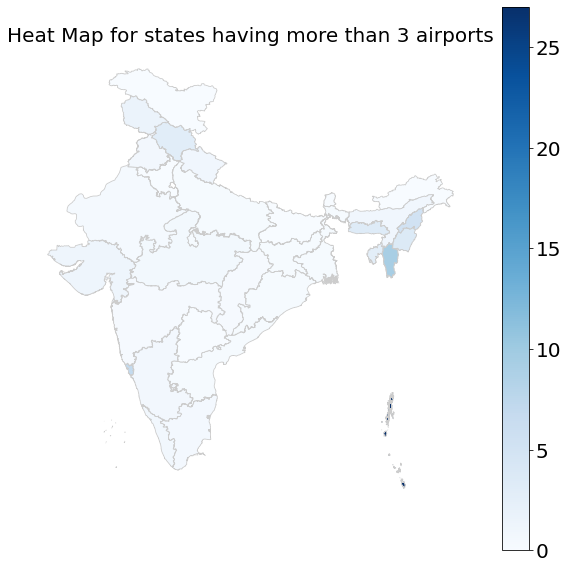

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Heat Map for states having more than 3 airports', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Blues'
vmin, vmax = 0, 27
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
gr3.plot('ratio', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8')
# plt.show()
# plt.savefig("heat_pos.png", transparent=True)

## **Centrality**

In [ ]:
from collections import Counter
deg_centrality = nx.degree_centrality(graph)
  
# G is the Karate Club Graph
# print(deg_centrality)
print(len(deg_centrality))
print(len(airport_india))
print(len(routes_india))
c = Counter(routes_india['Source Airport'])
print(len(c))

68
148
343
68


In [ ]:
# (nx.draw_networkx(graph))
print(routes_india)

    Source Airport Dest Airport  counts
0              AGR          BOM       1
1              AGR          HJR       1
2              AGX          COK       1
3              AJL          CCU       3
4              AJL          GAU       2
..             ...          ...     ...
338            VTZ          BLR       4
339            VTZ          BOM       3
340            VTZ          CCU       2
341            VTZ          DEL       1
342            VTZ          MAA       2

[343 rows x 3 columns]


In [ ]:
copy_AI_deg = airport_india
centrality_degree = []
for index, row in copy_AI_deg.iterrows():
  if row['IATA'] not in deg_centrality:
    centrality_degree.append(0)
  else:
    centrality_degree.append(deg_centrality[row['IATA']])

copy_AI_deg['centrality_degree'] = centrality_degree

In [ ]:
copy_AI_deg

,Name,Lat,Long,IATA,ICAO,centrality_degree
ID,,,,,,
2994,Sardar Vallabhbhai Patel International Airport,23.077200,72.634697,AMD,VAAH,0.238806
2995,Akola Airport,20.698999,77.058601,AKD,VAAK,0.000000
2996,Aurangabad Airport,19.862700,75.398102,IXU,VAAU,0.059701
2997,Chhatrapati Shivaji International Airport,19.088699,72.867897,BOM,VABB,1.253731
2998,Bilaspur Airport,21.988400,82.111000,PAB,VABI,0.000000
...,...,...,...,...,...,...
13513,Shirdi Airport,19.688611,74.378889,SAG,VASD,0.000000
13514,Jeypore Airport,18.879999,82.552002,PYB,VEJP,0.000000
13724,Kishangarh Airport,26.601473,74.814147,KQH,VIKG,0.000000


In [ ]:
copy_AII_deg = copy_AI_deg.drop(copy_AI_deg[(copy_AI_deg['centrality_degree'] == 0 )].index)
copy_AII_deg = copy_AII_deg.sort_values('centrality_degree')
copy_AII_deg

,Name,Lat,Long,IATA,ICAO,centrality_degree
ID,,,,,,
7774,Mysore Airport,12.230000,76.655833,MYQ,VOMY,0.029851
6760,Kangra Airport,32.165100,76.263397,DHM,VIGG,0.029851
3090,Kanpur Airport,26.404301,80.410103,KNU,VICX,0.029851
3094,Gwalior Airport,26.293301,78.227798,GWL,VIGR,0.029851
3103,Ludhiana Airport,30.854700,75.952599,LUH,VILD,0.029851
...,...,...,...,...,...,...
3144,Chennai International Airport,12.990005,80.169296,MAA,VOMM,0.447761
3131,Kempegowda International Airport,13.197900,77.706299,BLR,VOBL,0.686567
3043,Netaji Subhash Chandra Bose International Airport,22.654699,88.446701,CCU,VECC,0.716418


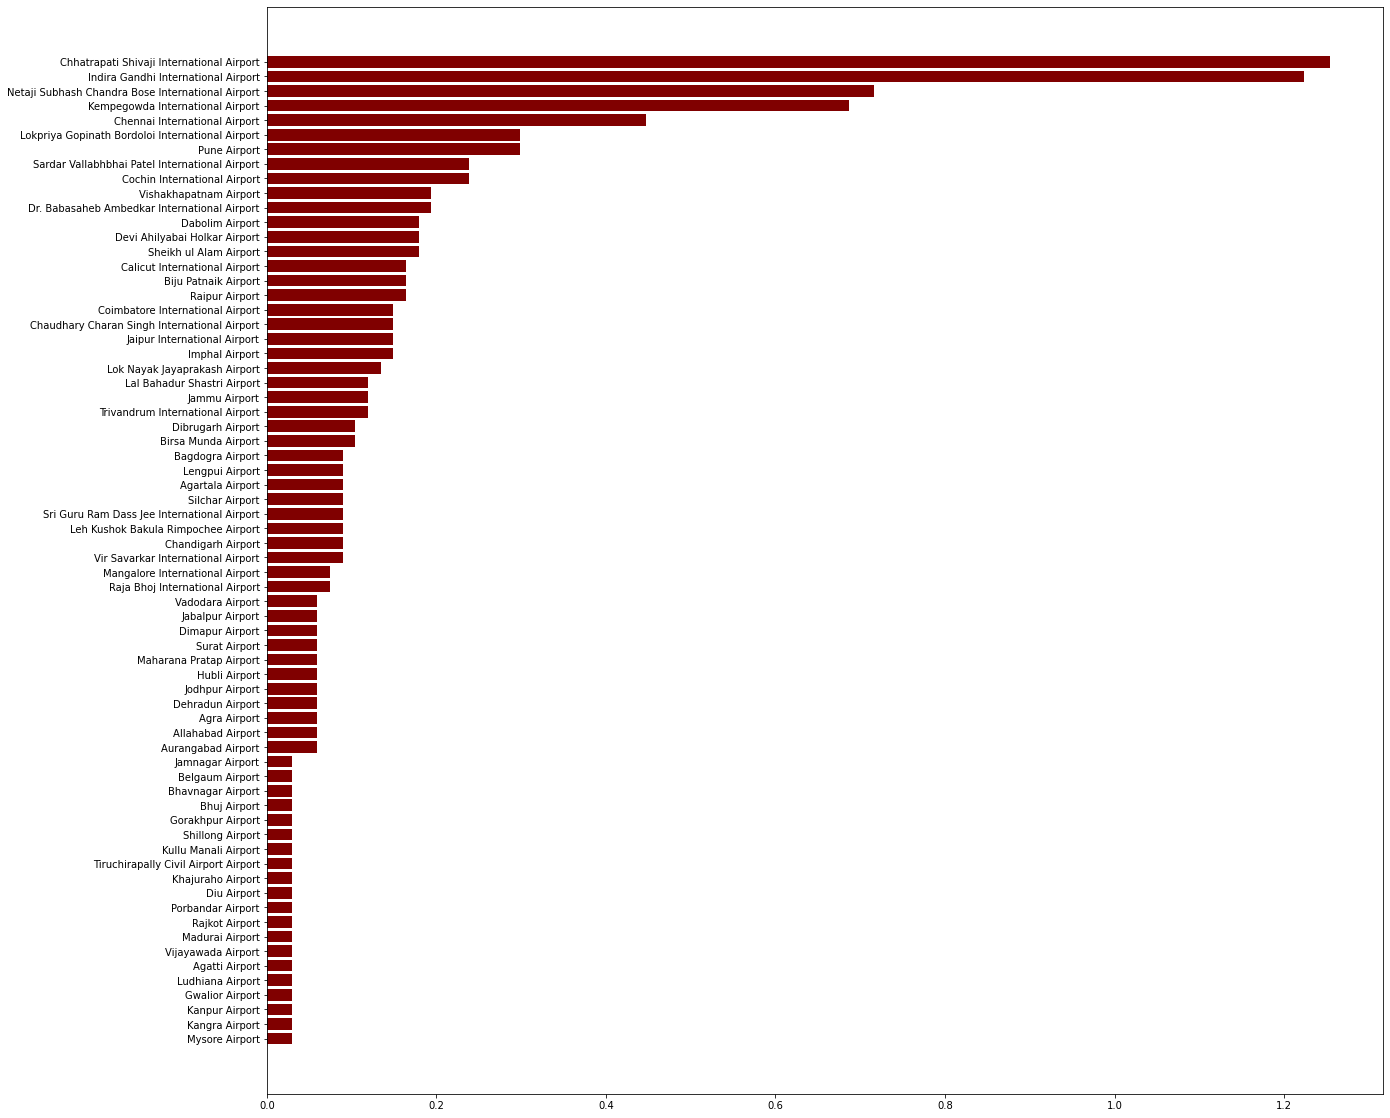

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 20))
# plt.figsize(20, 20)
plt.barh(copy_AII_deg['Name'], copy_AII_deg['centrality_degree'], color ='maroon')
# ax.invert_yaxis()

plt.show()

In [ ]:
indeg_centrality = nx.in_degree_centrality(graph)
copy_AI_indeg = airport_india
centrality_indeg = []
for index, row in copy_AI_indeg.iterrows():
  if row['IATA'] not in indeg_centrality:
    centrality_indeg.append(0)
  else:
    centrality_indeg.append(indeg_centrality[row['IATA']])

copy_AI_indeg['centrality_indegree'] = centrality_indeg
copy_AI_indeg

,Name,Lat,Long,IATA,ICAO,centrality_degree,centrality_indegree
ID,,,,,,,
2994,Sardar Vallabhbhai Patel International Airport,23.077200,72.634697,AMD,VAAH,0.238806,0.119403
2995,Akola Airport,20.698999,77.058601,AKD,VAAK,0.000000,0.000000
2996,Aurangabad Airport,19.862700,75.398102,IXU,VAAU,0.059701,0.029851
2997,Chhatrapati Shivaji International Airport,19.088699,72.867897,BOM,VABB,1.253731,0.626866
2998,Bilaspur Airport,21.988400,82.111000,PAB,VABI,0.000000,0.000000
...,...,...,...,...,...,...,...
13513,Shirdi Airport,19.688611,74.378889,SAG,VASD,0.000000,0.000000
13514,Jeypore Airport,18.879999,82.552002,PYB,VEJP,0.000000,0.000000
13724,Kishangarh Airport,26.601473,74.814147,KQH,VIKG,0.000000,0.000000


In [ ]:
outdeg_centrality = nx.out_degree_centrality(graph)
copy_AI_outdeg = airport_india
centrality_outdeg = []
for index, row in copy_AI_outdeg.iterrows():
  if row['IATA'] not in outdeg_centrality:
    centrality_outdeg.append(0)
  else:
    centrality_outdeg.append(outdeg_centrality[row['IATA']])

copy_AI_outdeg['centrality_outdegree'] = centrality_outdeg
copy_AI_outdeg

,Name,Lat,Long,IATA,ICAO,centrality_degree,centrality_indegree,centrality_outdegree
ID,,,,,,,,
2994,Sardar Vallabhbhai Patel International Airport,23.077200,72.634697,AMD,VAAH,0.238806,0.119403,0.119403
2995,Akola Airport,20.698999,77.058601,AKD,VAAK,0.000000,0.000000,0.000000
2996,Aurangabad Airport,19.862700,75.398102,IXU,VAAU,0.059701,0.029851,0.029851
2997,Chhatrapati Shivaji International Airport,19.088699,72.867897,BOM,VABB,1.253731,0.626866,0.626866
2998,Bilaspur Airport,21.988400,82.111000,PAB,VABI,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
13513,Shirdi Airport,19.688611,74.378889,SAG,VASD,0.000000,0.000000,0.000000
13514,Jeypore Airport,18.879999,82.552002,PYB,VEJP,0.000000,0.000000,0.000000
13724,Kishangarh Airport,26.601473,74.814147,KQH,VIKG,0.000000,0.000000,0.000000


In [ ]:
cl_centrality = nx.closeness_centrality(graph)
copy_AI_cl = airport_india
centrality_cl = []
for index, row in copy_AI_cl.iterrows():
  if row['IATA'] not in cl_centrality:
    centrality_cl.append(0)
  else:
    centrality_cl.append(cl_centrality[row['IATA']])

copy_AI_cl['centrality_closeness'] = centrality_cl
copy_AI_cl

,Name,Lat,Long,IATA,ICAO,centrality_degree,centrality_indegree,centrality_outdegree,centrality_closeness
ID,,,,,,,,,
2994,Sardar Vallabhbhai Patel International Airport,23.077200,72.634697,AMD,VAAH,0.238806,0.119403,0.119403,0.519380
2995,Akola Airport,20.698999,77.058601,AKD,VAAK,0.000000,0.000000,0.000000,0.000000
2996,Aurangabad Airport,19.862700,75.398102,IXU,VAAU,0.059701,0.029851,0.029851,0.455782
2997,Chhatrapati Shivaji International Airport,19.088699,72.867897,BOM,VABB,1.253731,0.626866,0.626866,0.728261
2998,Bilaspur Airport,21.988400,82.111000,PAB,VABI,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
13513,Shirdi Airport,19.688611,74.378889,SAG,VASD,0.000000,0.000000,0.000000,0.000000
13514,Jeypore Airport,18.879999,82.552002,PYB,VEJP,0.000000,0.000000,0.000000,0.000000
13724,Kishangarh Airport,26.601473,74.814147,KQH,VIKG,0.000000,0.000000,0.000000,0.000000


In [ ]:
copy_AII_cl = copy_AI_cl.drop(copy_AI_cl[(copy_AI_cl['centrality_closeness'] == 0 )].index)
copy_AII_cl = copy_AII_cl.sort_values('centrality_closeness')
copy_AII_cl

,Name,Lat,Long,IATA,ICAO,centrality_degree,centrality_indegree,centrality_outdegree,centrality_closeness
ID,,,,,,,,,
3018,Porbandar Airport,21.648701,69.657204,PBD,VAPR,0.029851,0.014925,0.014925,0.301802
3012,Khajuraho Airport,24.817200,79.918602,HJR,VAKJ,0.029851,0.014925,0.014925,0.303167
3130,Agatti Airport,10.823700,72.176003,AGX,VOAT,0.029851,0.014925,0.014925,0.333333
3142,Madurai Airport,9.834510,78.093399,IXM,VOMD,0.029851,0.014925,0.014925,0.358289
3152,Tiruchirapally Civil Airport Airport,10.765400,78.709702,TRZ,VOTR,0.029851,0.014925,0.014925,0.358289
...,...,...,...,...,...,...,...,...,...
3144,Chennai International Airport,12.990005,80.169296,MAA,VOMM,0.447761,0.223881,0.223881,0.553719
3131,Kempegowda International Airport,13.197900,77.706299,BLR,VOBL,0.686567,0.343284,0.343284,0.592920
3043,Netaji Subhash Chandra Bose International Airport,22.654699,88.446701,CCU,VECC,0.716418,0.358209,0.358209,0.598214


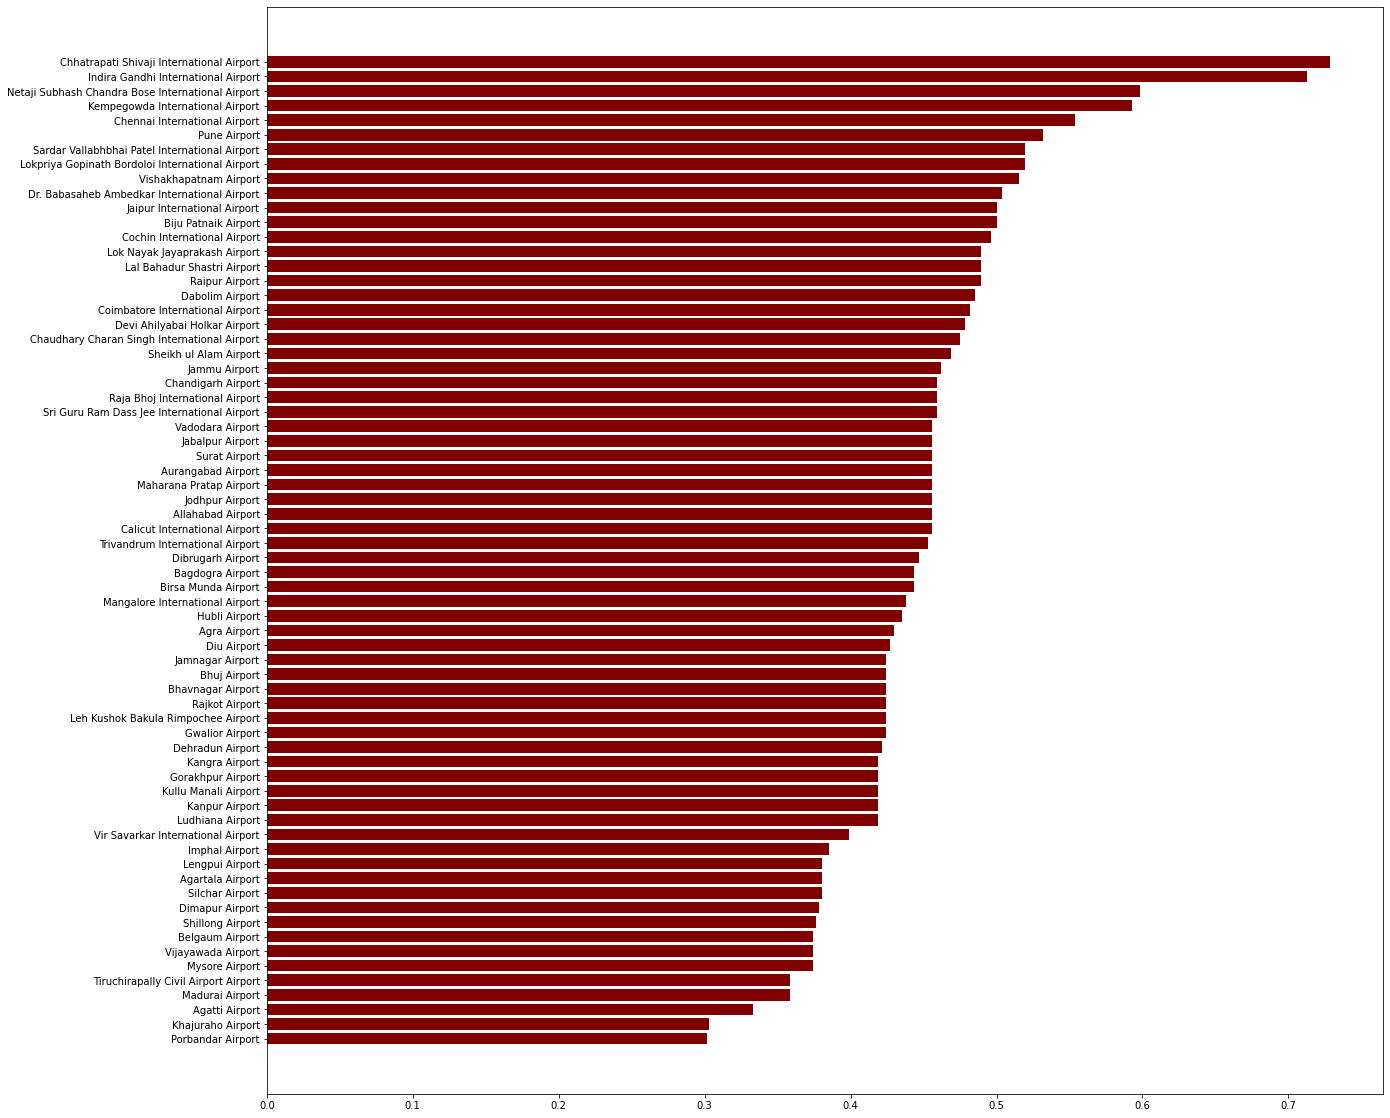

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 20))
plt.barh(copy_AII_cl['Name'], copy_AII_cl['centrality_closeness'], color ='maroon')

plt.show()

In [ ]:
bet_centrality = nx.betweenness_centrality(graph, normalized = True, endpoints = False)
copy_AI_bet = airport_india
centrality_bet = []
for index, row in copy_AI_bet.iterrows():
  if row['IATA'] not in bet_centrality:
    centrality_bet.append(0)
  else:
    centrality_bet.append(bet_centrality[row['IATA']])

copy_AI_bet['centrality_betweeness'] = centrality_bet
copy_AI_bet

,Name,Lat,Long,IATA,ICAO,centrality_degree,centrality_indegree,centrality_outdegree,centrality_closeness,centrality_betweeness
ID,,,,,,,,,,
2994,Sardar Vallabhbhai Patel International Airport,23.077200,72.634697,AMD,VAAH,0.238806,0.119403,0.119403,0.519380,0.000922
2995,Akola Airport,20.698999,77.058601,AKD,VAAK,0.000000,0.000000,0.000000,0.000000,0.000000
2996,Aurangabad Airport,19.862700,75.398102,IXU,VAAU,0.059701,0.029851,0.029851,0.455782,0.000000
2997,Chhatrapati Shivaji International Airport,19.088699,72.867897,BOM,VABB,1.253731,0.626866,0.626866,0.728261,0.414277
2998,Bilaspur Airport,21.988400,82.111000,PAB,VABI,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
13513,Shirdi Airport,19.688611,74.378889,SAG,VASD,0.000000,0.000000,0.000000,0.000000,0.000000
13514,Jeypore Airport,18.879999,82.552002,PYB,VEJP,0.000000,0.000000,0.000000,0.000000,0.000000
13724,Kishangarh Airport,26.601473,74.814147,KQH,VIKG,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
copy_AII_bet = copy_AI_bet.drop(copy_AI_bet[(copy_AI_bet['centrality_betweeness'] == 0 )].index)
copy_AII_bet = copy_AII_bet.sort_values('centrality_betweeness')
copy_AII_bet

,Name,Lat,Long,IATA,ICAO,centrality_degree,centrality_indegree,centrality_outdegree,centrality_closeness,centrality_betweeness
ID,,,,,,,,,,
3146,Vir Savarkar International Airport,11.641200,92.729698,IXZ,VOPB,0.089552,0.044776,0.044776,0.398810,0.000113
3012,Khajuraho Airport,24.817200,79.918602,HJR,VAKJ,0.029851,0.014925,0.014925,0.303167,0.000113
3050,Imphal Airport,24.760000,93.896698,IMF,VEIM,0.149254,0.074627,0.074627,0.385057,0.000452
3008,Devi Ahilyabai Holkar Airport,22.721800,75.801102,IDR,VAID,0.179104,0.089552,0.089552,0.478571,0.000520
3063,Birsa Munda Airport,23.314301,85.321701,IXR,VERC,0.104478,0.044776,0.059701,0.443709,0.000635
3066,Vishakhapatnam Airport,17.721201,83.224503,VTZ,VEVZ,0.194030,0.104478,0.089552,0.515385,0.000656
3137,Calicut International Airport,11.136800,75.955299,CCJ,VOCL,0.164179,0.074627,0.089552,0.455782,0.000666
3015,Dr. Babasaheb Ambedkar International Airport,21.092199,79.047203,NAG,VANP,0.194030,0.089552,0.104478,0.503759,0.000690
3135,Coimbatore International Airport,11.030000,77.043404,CJB,VOCB,0.149254,0.074627,0.074627,0.482014,0.000785


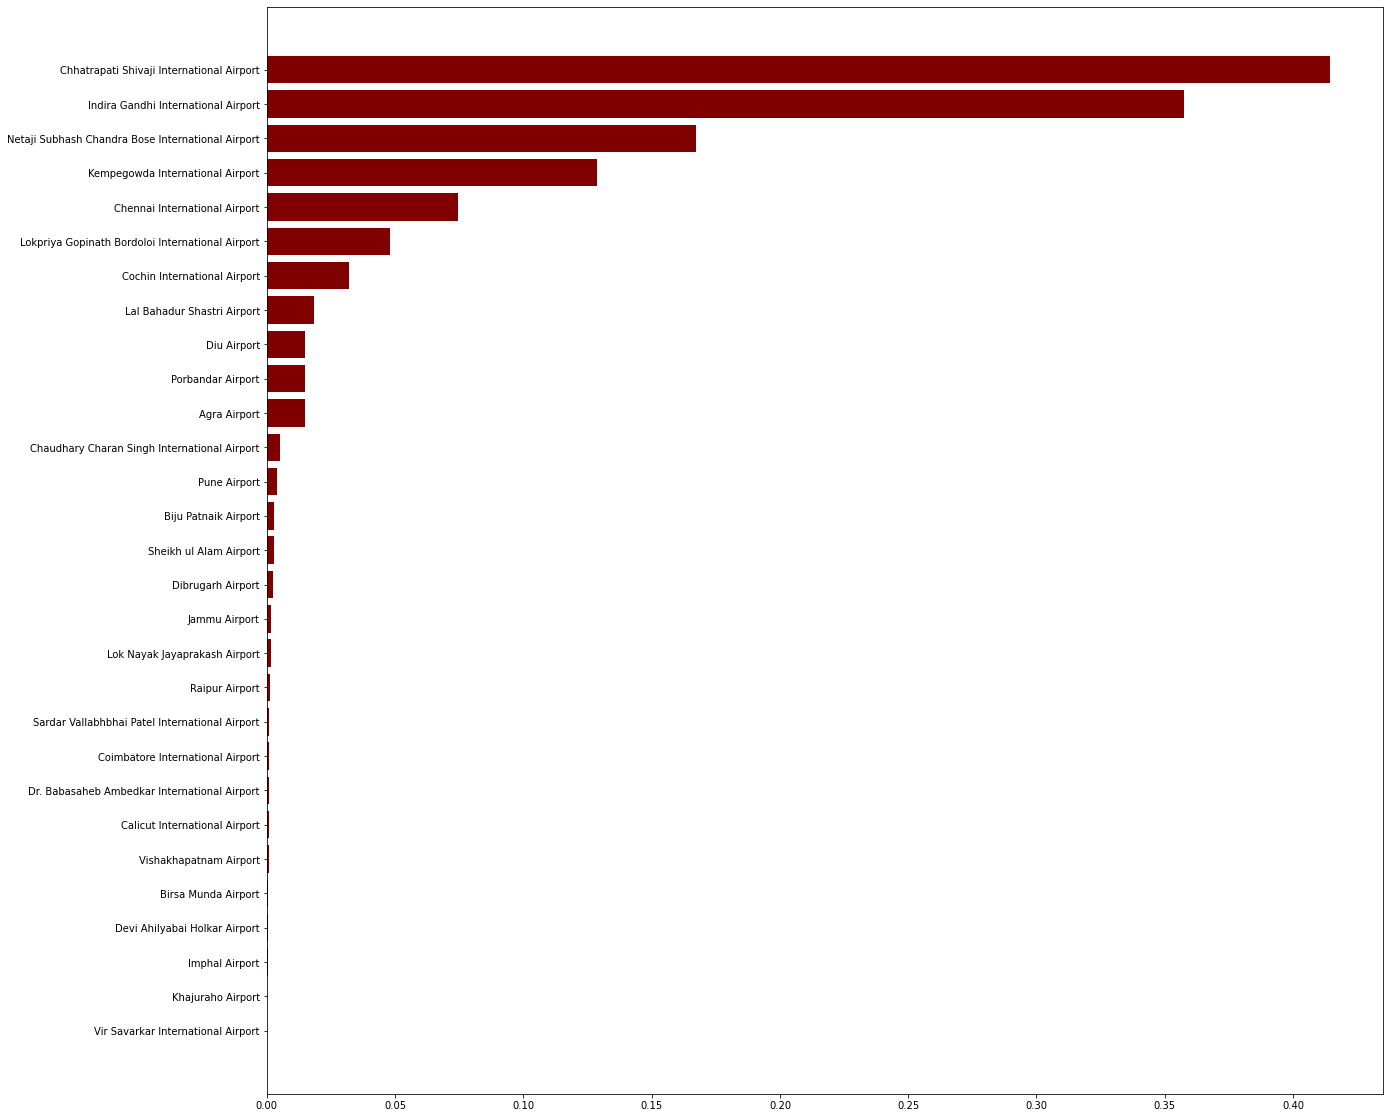

In [ ]:
fig, ax = plt.subplots(1, figsize = (20, 20))
plt.barh(copy_AII_bet['Name'], copy_AII_bet['centrality_betweeness'], color ='maroon')

plt.show()

['IXZ', 'CCU', 'BOM', 'AGR', 'HJR']
['IXZ', 'DEL', 'BOM', 'AGR', 'HJR']
['IXZ', 'MAA', 'BOM', 'AGR', 'HJR']
['IXZ', 'CCU', 'VNS', 'AGR', 'HJR']
['IXZ', 'DEL', 'VNS', 'AGR', 'HJR']


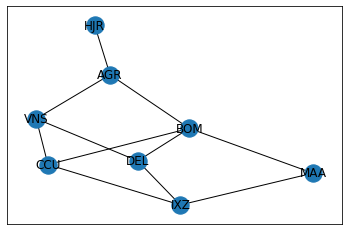

In [ ]:
all_sources = []
all_destinations = []
color = []
for path in nx.all_shortest_paths(graph, source='IXZ', target='HJR'):
  a = path
  print(a)
  n = len(a)
  all_sources += a[:n-1]
  all_destinations += a[1:n]
  color += ['red']*(n-1)



edges = pd.DataFrame(
    {
        "source": all_sources,
        "target": all_destinations,
        "weight": [3, 4, 5, 6]*5,
        "color": color
    }
)
G = nx.from_pandas_edgelist(edges, edge_attr=True)
nx.draw_networkx(G)

In [ ]:
for path in nx.shortest_path(graph, source='IXZ', target='HJR'):
  print(path)

IXZ
CCU
BOM
AGR
HJR


In [ ]:
import random

In [ ]:
def get_least_hops_routes(df):
  plt.figure(figsize = (10, 10))
  graph = nx.from_pandas_edgelist(routes_india, source = 'Source Airport', target = 'Dest Airport',
                                edge_attr = 'counts', create_using = nx.DiGraph())
  m = Basemap(
          projection='merc',
          # llcrnrlon=-180,
          # llcrnrlat=10,
          # urcrnrlon=-50,
          # urcrnrlat=70,
          # lat_ts=0,
          llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77,
          resolution='l',
          suppress_ticks=True)

  # print(m)

  # import long lat as m attribute
  mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
  # print(mx, my)
  pos = {}
  for count, elem in enumerate (pos_data['IATA']):
      pos[elem] = (mx[count], my[count])

  # draw nodes and edges and over aly on basemap
  # print(counts["total_flight"])

  get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

  for path in nx.all_shortest_paths(graph, source='AJL', target='COK'):
    a = path
    print(a)
    n = len(a)
    all_sources = a[:n-1]
    all_destinations = a[1:n]
    selected_color = get_colors(1)[0]
    color = [selected_color]*(n-1)
    # color += ['red']*(n-1)

    edges = pd.DataFrame(
        {
            "source": all_sources,
            "target": all_destinations,
            # "weight": [3, 4, 5, 6]*5,
            "color": color
        }
    )
    G = nx.from_pandas_edgelist(edges, edge_attr=True)

    nx.draw_networkx_nodes(G = G, pos = pos, nodelist = G.nodes(), node_color = 'r', alpha = 0.8,
                            node_size = 5, label = {k:k for k in list(G.nodes())})
    nx.draw_networkx_edges(G = G, pos = pos, edge_color=selected_color, width = 0.75, 
                            alpha=1, arrows = True)
    nx.draw_networkx_labels(G = G, pos = pos, labels= {k:k for k in list(G.nodes())}, font_size=12)

  m.drawcountries(linewidth = 1)
  m.drawstates(linewidth = 0.2)
  m.drawcoastlines(linewidth=1)
  plt.tight_layout()
  plt.savefig("./map_2.png", format = "png", dpi = 300)

  plt.show()

['AJL', 'CCU', 'BLR', 'COK']
['AJL', 'GAU', 'BLR', 'COK']
['AJL', 'CCU', 'BOM', 'COK']
['AJL', 'GAU', 'BOM', 'COK']
['AJL', 'CCU', 'DEL', 'COK']
['AJL', 'GAU', 'DEL', 'COK']
['AJL', 'CCU', 'MAA', 'COK']
['AJL', 'CCU', 'PNQ', 'COK']


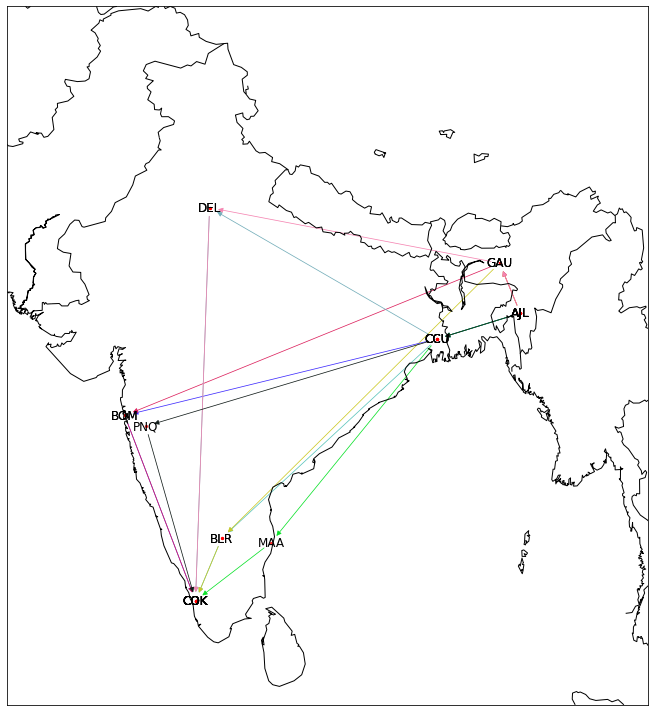

In [ ]:
get_least_hops_routes(graph)

In [ ]:
info = {}
for index, row in airport_india.iterrows():
  info[row['IATA']] = (row['Lat'], row['Long'])

In [ ]:
import geopy.distance

routes_india
wted_routes_india = routes_india
wt = []
  
for index, row in wted_routes_india.iterrows():
  src = info[row['Source Airport']]
  dest = info[row['Dest Airport']]
  d = geopy.distance.vincenty(src, dest).km
  wt.append(d)
wted_routes_india['Distance'] = wt
# wted_routes_india

In [ ]:
def get_min_weight_graph(df, weight, closed=[]):

  wted_graph = nx.from_pandas_edgelist(df, source = 'Source Airport', target = 'Dest Airport',
                                  edge_attr = weight, create_using = nx.DiGraph())

  for airport in closed:
    wted_graph.remove_node(airport)

  plt.figure(figsize = (10, 10))
  m = Basemap(
          projection='merc',
          # llcrnrlon=-180,
          # llcrnrlat=10,
          # urcrnrlon=-50,
          # urcrnrlat=70,
          # lat_ts=0,
          llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77,
          resolution='l',
          suppress_ticks=True)

  mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)

  pos = {}
  for count, elem in enumerate (pos_data['IATA']):
      pos[elem] = (mx[count], my[count])

  for path in nx.all_shortest_paths(wted_graph, source='AJL', target='COK', weight = weight):
    a = path
    print(a)
    n = len(a)
    all_sources = a[:n-1]
    all_destinations = a[1:n]
    selected_color = 'red'
    color = [selected_color]*(n-1)
    
    edges = pd.DataFrame(
        {
            "source": all_sources,
            "target": all_destinations,
            "color": color
        }
    )
    G = nx.from_pandas_edgelist(edges, edge_attr=True)

    nx.draw_networkx_nodes(G = G, pos = pos, nodelist = G.nodes(), node_color = 'r', alpha = 0.8,
                            node_size = 5, label = {k:k for k in list(G.nodes())})
    nx.draw_networkx_edges(G = G, pos = pos, edge_color=selected_color, width = 0.75, 
                            alpha=1, arrows = True)
    nx.draw_networkx_labels(G = G, pos = pos, labels= {k:k for k in list(G.nodes())}, font_size=12)

  m.drawcountries(linewidth = 1)
  m.drawstates(linewidth = 0.2)
  m.drawcoastlines(linewidth=1)
  plt.tight_layout()
  plt.savefig("./map_2.png", format = "png", dpi = 300)

  plt.show()

In [ ]:
wted_routes_india

,Source Airport,Dest Airport,counts,Distance
0,AGR,BOM,1,1034.214532
1,AGR,HJR,1,324.872427
2,AGX,COK,1,468.538934
3,AJL,CCU,3,446.756051
4,AJL,GAU,2,271.794681
...,...,...,...,...
338,VTZ,BLR,4,775.227410
339,VTZ,BOM,3,1104.522210
340,VTZ,CCU,2,771.984540
341,VTZ,DEL,1,1354.173283


In [ ]:
import random

min_dist = int(min(list(wted_routes_india['Distance'])))
costs = []
for index, row in wted_routes_india.iterrows():
  
  if(min_dist == int(row['Distance'])):
    cur_cost = row['Distance'] * min_dist
  else:
    cur_cost = row['Distance'] * random.randrange(min_dist, int(row['Distance']))
  costs.append(cur_cost)

min_cost = min(costs)
max_cost = max(costs)
tmax = 30000
tmin = 3000
for i, cost in enumerate(costs):
  costs[i] = (costs[i] - min_cost) / (max_cost - min_cost) * (tmax - tmin) + tmin

wted_routes_india['Cost'] = costs



wted_routes_india

,Source Airport,Dest Airport,counts,Distance,Cost
0,AGR,BOM,1,1034.214532,5848.186811
1,AGR,HJR,1,324.872427,3530.129868
2,AGX,COK,1,468.538934,3912.378785
3,AJL,CCU,3,446.756051,3897.610395
4,AJL,GAU,2,271.794681,3232.647600
...,...,...,...,...,...
338,VTZ,BLR,4,775.227410,3612.081868
339,VTZ,BOM,3,1104.522210,4831.302856
340,VTZ,CCU,2,771.984540,5391.930751
341,VTZ,DEL,1,1354.173283,13349.490615


In [ ]:
wted_routes_india.to_csv('min_wted.csv')

In [ ]:
def normalize(val, min_val, max_val):
  return (val - min_val) / (max_val - min_val)

In [ ]:
import random

min_dist = int(min(list(wted_routes_india['Distance'])))
time = []
for index, row in wted_routes_india.iterrows():
  
  if(min_dist == int(row['Distance'])):
    cur_time = row['Distance'] * min_dist
  else:
    cur_time = row['Distance'] * random.randrange(min_dist, int(row['Distance']))
  time.append(cur_time)

min_time = min(time)
max_time = max(time)
tmax = 60
tmin = 360
for i, cost in enumerate(time):
  time[i] = normalize(time[i], min_time, max_time) * (tmax - tmin) + tmin
  time[i] = time[i] / 60

wted_routes_india['Time'] = time

wted_routes_india

,Source Airport,Dest Airport,counts,Distance,Cost,Time
0,AGR,BOM,1,1034.214532,5848.186811,5.375218
1,AGR,HJR,1,324.872427,3530.129868,5.911062
2,AGX,COK,1,468.538934,3912.378785,5.741326
3,AJL,CCU,3,446.756051,3897.610395,5.748698
4,AJL,GAU,2,271.794681,3232.647600,5.955564
...,...,...,...,...,...,...
338,VTZ,BLR,4,775.227410,3612.081868,5.473026
339,VTZ,BOM,3,1104.522210,4831.302856,5.308992
340,VTZ,CCU,2,771.984540,5391.930751,5.129913
341,VTZ,DEL,1,1354.173283,13349.490615,5.017059


In [ ]:
import pandas as pd
wted_routes_india = pd.read_csv('min_wted.csv')
wted_routes_india

,Unnamed: 0,Source Airport,Dest Airport,counts,Distance,Cost,Time,Score
0,0,AGR,BOM,1,1034.214532,5965.462121,4.869273,0.536652
1,1,AGR,HJR,1,324.872427,3615.346530,5.964707,0.612264
2,2,AGX,COK,1,468.538934,3812.489464,5.843069,0.605879
3,3,AJL,CCU,3,446.756051,3644.860201,5.896705,0.609540
4,4,AJL,GAU,2,271.794681,3221.558351,5.974822,0.606878
...,...,...,...,...,...,...,...,...
338,338,VTZ,BLR,4,775.227410,3606.665403,5.681504,0.597057
339,339,VTZ,BOM,3,1104.522210,9118.101625,4.795923,0.565826
340,340,VTZ,CCU,2,771.984540,3734.569453,5.617761,0.590693
341,341,VTZ,DEL,1,1354.173283,14035.874206,5.749644,0.745377


['AJL', 'CCU', 'MAA', 'COK']


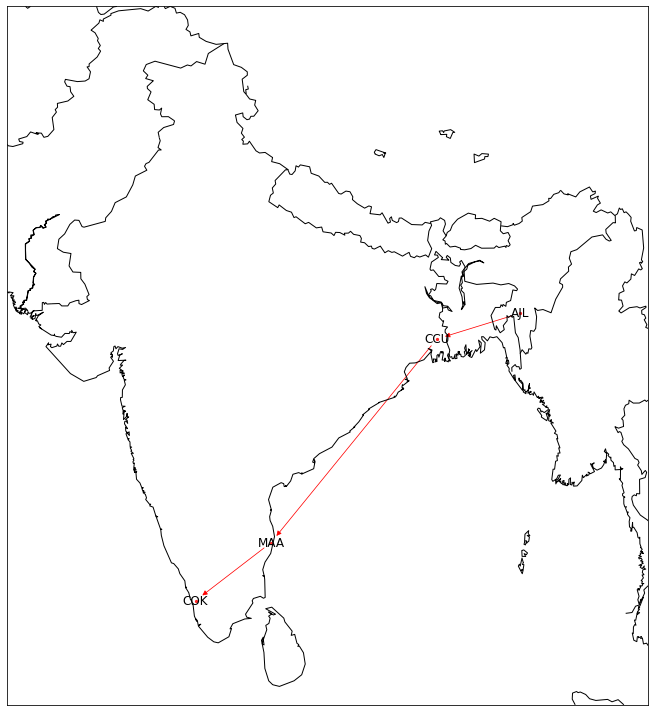

In [ ]:
get_min_weight_graph(wted_routes_india, 'Distance')

['AJL', 'GAU', 'BLR', 'COK']


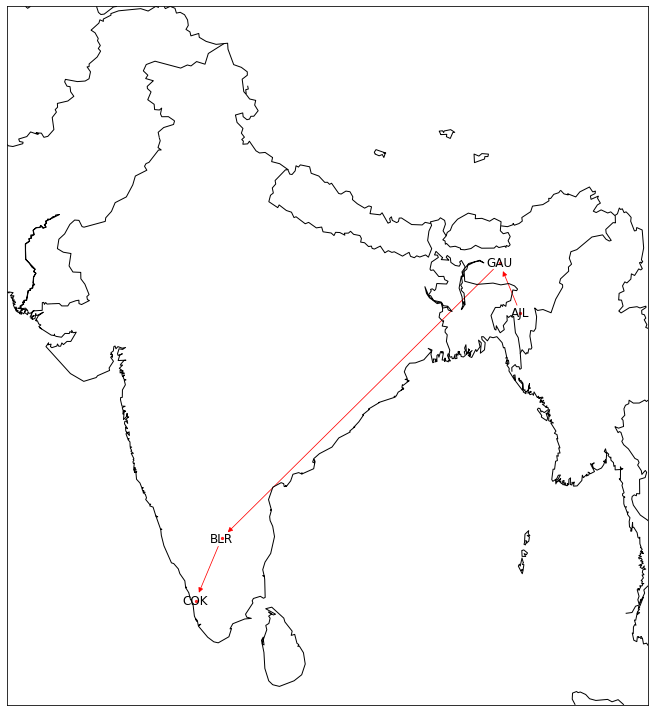

In [ ]:
get_min_weight_graph(wted_routes_india, 'Distance', ['CCU'])

['AJL', 'CCU', 'BLR', 'COK']


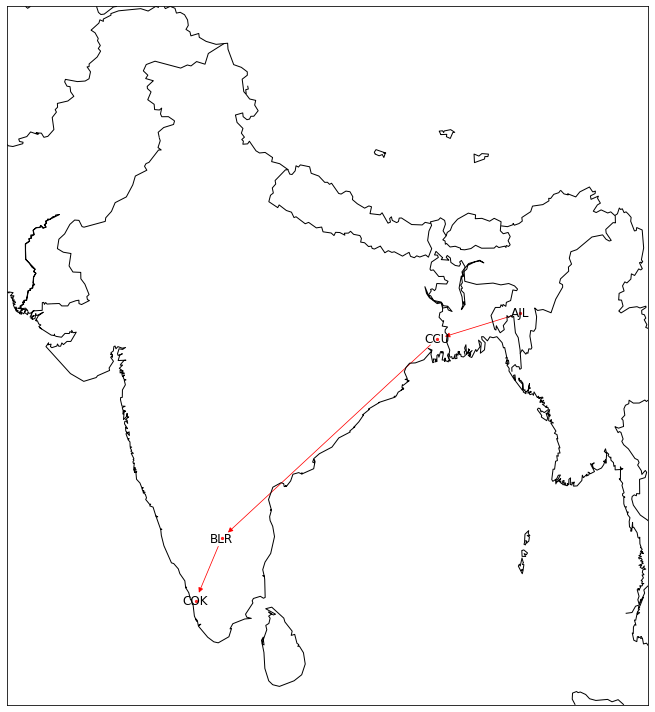

In [ ]:
get_min_weight_graph(wted_routes_india, 'Cost')

['AJL', 'GAU', 'BOM', 'COK']


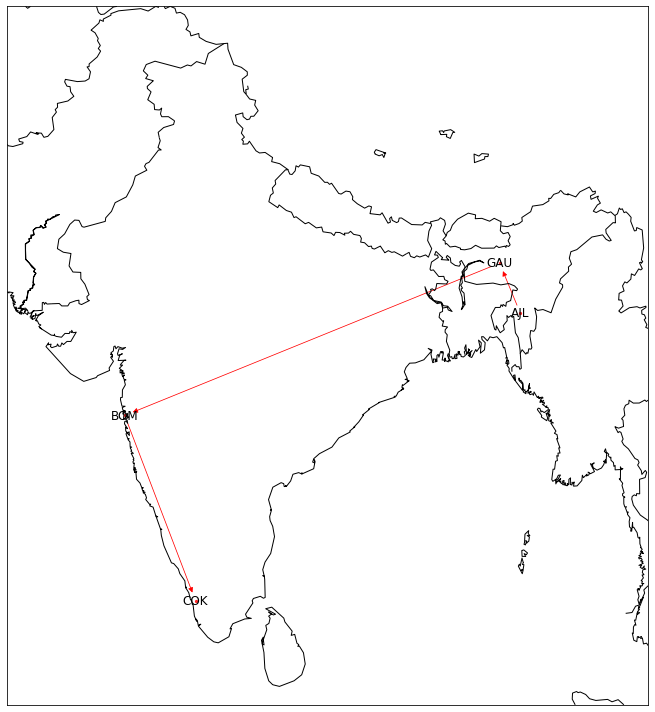

In [ ]:
get_min_weight_graph(wted_routes_india, 'Time')

In [ ]:
def get_optimal_route(df, preference_order):
  # preference_order = ['Distance', 'Cost', 'Time']
  w1 = 0.6
  w2 = 0.3
  w3 = 0.1

  max1 = max(df[preference_order[0]])
  min1 = min(df[preference_order[0]])
  max2 = max(df[preference_order[1]])
  min2 = min(df[preference_order[1]])
  max3 = max(df[preference_order[2]])
  min3 = min(df[preference_order[2]])

  weights = []
  for index, row in wted_routes_india.iterrows():
    curr_weight = (normalize(row[preference_order[0]], min1, max1) * w1) \
                + (normalize(row[preference_order[1]], min2, max2) * w2) \
                + (normalize(row[preference_order[2]], min3, max3) * w3)
    weights.append(curr_weight)
  
  df['Score'] = weights

  get_min_weight_graph(df, 'Score')
  print(df)

['AJL', 'GAU', 'BOM', 'COK']


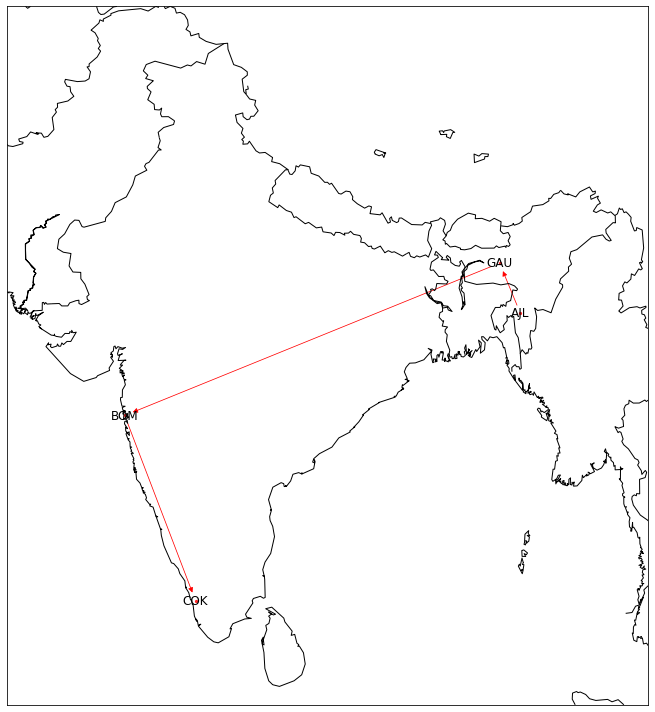

     Unnamed: 0 Source Airport Dest Airport  counts     Distance  \
0             0            AGR          BOM       1  1034.214532   
1             1            AGR          HJR       1   324.872427   
2             2            AGX          COK       1   468.538934   
3             3            AJL          CCU       3   446.756051   
4             4            AJL          GAU       2   271.794681   
..          ...            ...          ...     ...          ...   
338         338            VTZ          BLR       4   775.227410   
339         339            VTZ          BOM       3  1104.522210   
340         340            VTZ          CCU       2   771.984540   
341         341            VTZ          DEL       1  1354.173283   
342         342            VTZ          MAA       2   617.742943   

             Cost      Time     Score  
0     5965.462121  4.869273  0.536652  
1     3615.346530  5.964707  0.612264  
2     3812.489464  5.843069  0.605879  
3     3644.860201  5.89

In [ ]:
get_optimal_route(wted_routes_india, ['Time', 'Cost', 'Distance'])